# Calibration

In this section, we calibrate the parameters needed to calculate optimal stimulus with US data between 2001 and 2019. We  use the assumption that the economy is efficient on average. 

Before we start, we first load the necessary libraries for plotting and data cleaning. 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

We fetch the data series from FRED. Here, we use the `fredapi` python package to do this. Downloading Fred data series requires an API key, which you can register by going [here](https://research.stlouisfed.org/docs/api/api_key.html).

In [37]:
from fredapi import Fred
# API key needs to be taken out when deployed
fred = Fred(api_key='30adf5295a539a48e57fe367896a60e9')

We load our helper functions from `helpers.ipynb`.

In [38]:
%run helpers.ipynb

Our calibration period is between the start of 2001 and the end of 2019.

In [39]:
start_date = '2001-01-01'
end_date = '2019-12-31'

## Job Separation Rate $s$

The parameter $s$ is the job separation rate. We calibrate it with the average separation rate in the US over the sample period. 

In [40]:
s_ts = fred.get_series('JTSTSR', frequency='q', 
                       observation_start=start_date, observation_end=end_date)
# Convert percentage to decimal
s_ts = s_ts/100

Here is what the US job separation rate looks like over our sample period.

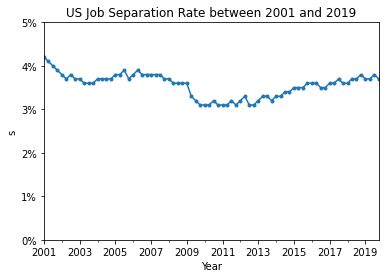

In [41]:
s_ax = s_ts.plot(title="US Job Separation Rate between 2001 and 2019", marker='.')
s_ax.set(xlabel='Year', ylabel='s', ylim=(0, 0.05))
s_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

We now calibrate $s$ and find that it is around $3.6\%$.

In [42]:
s = s_ts.mean()
s

0.03557894736842106

## Steady-State Unemployment Rate $\bar{u}$

We now calibrate $\bar{u}$, which is the steady-state unemployment rate. We calibrate it to be the average US unemployment rate over our sample period.

In [43]:
u_ts = fred.get_series('UNRATE', frequency='q', observation_start=start_date, observation_end=end_date)/100

This is what unemployment rate in the US looks like over our sample period:

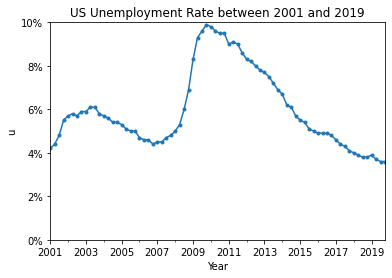

In [44]:
u_ax = u_ts.plot(title="US Unemployment Rate between 2001 and 2019", marker='.')
u_ax.set(xlabel='Year', ylabel='u', ylim=(0, 0.1))
u_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

Taking the average gives us the calibrated value of $\bar{u}$, which is around $6\%$.

In [45]:
u_bar = u_ts.mean()
u_bar

0.05974999999999999

## Steady-State Labor Market Tightness $\bar{x}$

We now claibrate $\bar{x}$, which denotes steady-state labor market tightness. We calibrate it with the average US labor market tightness over our sample period.

Note that labor market tightness is defined as:

$$x(t) = \frac{v(t)}{k-Y(t)},$$

where $v$ is the vacancy level, $k$ the productive capacity of households, and $Y$ the output. Therefore, $k - Y(t)$ is the unemployment level, since we assume output to only come from services provided by households. 

In [46]:
v_ts = fred.get_series('JTSJOL', frequency='q', 
                       observation_start=start_date, observation_end=end_date)
ul_ts = fred.get_series('UNEMPLOY', frequency='q', 
                        observation_start=start_date, observation_end=end_date)
x_ts = v_ts/ul_ts

Here is what labor market tightness in the US looks like over our sample period.

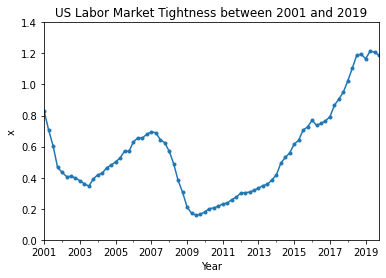

In [47]:
x_ax = x_ts.plot(title="US Labor Market Tightness between 2001 and 2019", marker='.')
x_ax.set(xlabel='Year', ylabel='x', ylim=(0, 1.4));

We now calibrate the steady-state labor market tightness $\bar{x}$ and find that it is around $0.56$.

In [48]:
x_bar = x_ts.mean()
x_bar

0.557752047505985

## Steady-State Ratio between Public and Private Employment $\overline{G/C}$

$\overline{G/C}$ is the steady-state ratio between public and private employment. We calibrate it to be the average value ratio between public and private employment in the US over our sample period. 

In [49]:
G_ts = fred.get_series('USGOVT', frequency='q', 
                       observation_start=start_date, observation_end=end_date)
C_ts = fred.get_series('USPRIV', frequency='q', 
                       observation_start=start_date, observation_end=end_date)
GC_ts = G_ts/C_ts

This is what the ratio between public and private employment in the US looks like over our sample period:

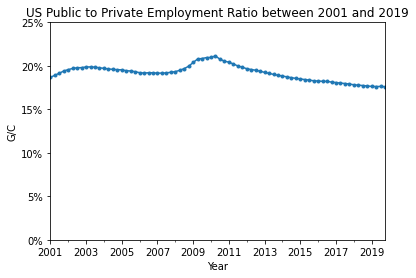

In [50]:
GC_ax = GC_ts.plot(title="US Public to Private Employment Ratio between 2001 and 2019", marker='.')
GC_ax.set(xlabel='Year', ylabel='G/C', ylim=(0, 0.25))
GC_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

We now calibrate the steady-state ratio $\overline{G/C}$, and find the average ratio between public and private employment to be around $19.2\%$.

In [51]:
GC_bar = GC_ts.mean()
GC_bar

0.19191729280673472

## Average Unemployment Multiplier $\bar{M}$   [![Generic badge](https://img.shields.io/badge/MS19-p.%201324~1325-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)

The parameter $\bar{M}$ is the average unemployment multiplier. The unemployment multiplier is estimated by measuring the percentage-point change in the unemployment rate when public expenditure increases by $1\%$ of GDP. 

Monacelli et al. ([2010](http://dx.doi.org/10.1016/j.jmoneco.2010.05.009), pp. 533–536) estimate a structural vector autoregression (SVAR) on US data and find unemployment multipliers between $0.2$ and $0.6$. Ramey ([2013](http://doi.org/10.7208/chicago/9780226018584.003.0002), pp.40–42) estimates SVARs on US data with various identification schemes and sample periods and finds unemployment multipliers between $0.2$ and $0.5$, except in one specification where the multiplier is $1$.

The multiplier entering our formula could be larger if multipliers are larger when unemployment is higher, as suggested by recent research on state-dependent multipliers. For instance, estimating regime-switching SVARs on US data, Auerbach and Gorodnichenko ([2012](http://doi.org/10.1257/pol.4.2.1), table 1) find that while the output multiplier is $0.6$ in expansions and $1$ on average, it is as high as $2.5$ in recessions.

Thus, we consider a range of unemployment multipliers with lower bound $0$ and upper bound $2$. We use $\bar{M} = 0.5$ for most calculations.

In [52]:
M_bar_h, M_bar_l = 2, 0
M_bar = 0.5

## Elasticity of Substitution between Public and Private Consumption $\epsilon$    [![Generic badge](https://img.shields.io/badge/MS19-p.%201324-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)

The parameter $\epsilon$ is the elasticity of substitution between public and private consumption. Amano and Wirjanto ([1997](https://doi.org/10.1162/003465397557187), [1998](https://doi.org/10.1006/redy.1998.0021)) estimate the elasticity of substitution between public and private consumption to be 0.9 and 1.56. Here, we consider three values: $\epsilon = 0.5, \epsilon = 1$ and $\epsilon = 1.5.$ You can also play with the parameter values of $\epsilon$ below.

In [53]:
epsilon_h, epsilon_l = 1.5, 0.5
epsilon = 1

## Matching Elasticity $\eta$    [![Generic badge](https://img.shields.io/badge/LMS18a-p.%20D7-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/5.html) 

The parameter $\eta$ is the matching elasticity, which is the elasticity of the matching function with respect to unemployment. A vast literature has attempted to estimate $\eta$. In their survey, Petrongolo
and Pissarides ([2001](https://doi.org/10.1257/jel.39.2.390), p. 424) conclude that the estimates of $\eta$ fall between 0.5 and 0.7. Here, we will set $\eta$ to be $0.6$, with an upper bound of $0.7$ and a lower bound of $0.5$.

Click the badge above for the reference to a more detailed discussion of the calibration of $\eta$. 

In [54]:
eta_h, eta_l = 0.7, 0.5
eta = 0.6

 ## Matching Efficacy $\omega$   [![Generic badge](https://img.shields.io/badge/LMS18a-p.%20G28-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/5.html) 

 
The parameter $\omega$ denotes matching efficacy in the matching function. 

We calibrate $\omega$ by using the following equation: 

                $\omega = \bar{x}^{\eta - 1}\cdot \frac{s\cdot (1-\bar{u})}{\bar{u}\cdot e}, $            [![Generic badge](https://img.shields.io/badge/MS19-Eq%203-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  
     
where $e$ is the average job-search effort, which is normalized to $1$. We find that $\omega$ is roughly $0.71$.

In [55]:
omega = omega_func(eta=eta, x_bar=x_bar, u_bar=u_bar)
omega

0.7071671173494025

We also calculate values of $\omega$ at the bounds of $\eta$:

In [56]:
omega_h = omega_func(eta=eta_h, x_bar=x_bar, u_bar=u_bar)
omega_l = omega_func(eta=eta_l, x_bar=x_bar, u_bar=u_bar)

## Job Posting Cost $\rho$

$\rho$ is the cost of posting a vacancy. To calibrate $\rho$, we use the following relationship between the recruiter-producer ratio ($\tau$) and labor market tightness ($x$):

                $\tau(x) = \frac{\rho s}{q(x) - \rho s}, $              [![Generic badge](https://img.shields.io/badge/MS19-Eq%203-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  
                
where

                $q(x(t)) = \frac{h(t)}{v(t)}=\omega x(t)^{-\eta}.$         [![Generic badge](https://img.shields.io/badge/MS19-p.%201305-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  
                
This gives us that:

                $\rho = \frac{\omega x^{-\eta}\tau}{(1+\tau)s}.$
                
Note that since the relationship above holds for all $\tau$'s and $x$'s, we can find $\rho$ if we know what $\tau$ and $x$ are at the efficient level. 

When labor market tightness is efficient, we have:

                $(1-\eta)\bar{u}-\eta\bar{\tau} = 0, $            [![Generic badge](https://img.shields.io/badge/MS19-Eq%205-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

which can be re-arranged into:

                $\bar{\tau} = \frac{(1-\eta)\bar{u}}{\eta}.$ 

With this, we can calculate $\rho$ by first computing $\bar{\tau}$.

In [57]:
tau_bar = tau_bar_func(eta=eta, u_bar=u_bar)
tau_bar

0.03983333333333333

We now calibrate $\rho$, which we find to be around $1.08$:

In [58]:
rho = rho_func(eta=eta, omega=omega, tau=tau_bar, s=s, u=u_bar, x=x_bar)
rho

1.080804575426955

We also compute $\rho$'s upper and lower bound given bounds on $\eta$:

In [59]:
rho_h = rho_func(eta=eta, omega=omega_h, tau=tau_bar_func(eta=eta_h, u_bar=u_bar), 
                 s=s, x=x_bar, u=u_bar)
rho_l = rho_func(eta=eta, omega=omega_l, tau=tau_bar_func(eta=eta_l, u_bar=u_bar), 
                 s=s, x=x_bar, u=u_bar)

## Recruiter-Producer Ratio $\tau$

As mentioned earlier, $\tau$ is the recruiter-producer ratio. Recall that

                $\tau(x) = \frac{\rho s}{q(x) - \rho s}, $              [![Generic badge](https://img.shields.io/badge/MS19-Eq%203-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html) 
                
where

                $q(x(t)) = \frac{h(t)}{v(t)}=\omega x(t)^{-\eta}.$         [![Generic badge](https://img.shields.io/badge/MS19-p.%201305-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

We now compute the time series for $\tau$ over our sample period.
           

In [60]:
tau_ts = tau_func(x=x_ts, s=s, rho=rho, omega=omega, eta=eta)

This is what $\tau$ looks like over our sample period with different values of $\eta$ :

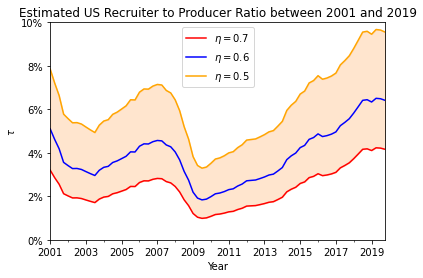

In [61]:
tau_h_ts = tau_func(x=x_ts, s=s, rho=rho_h, omega=omega_h, eta=eta_h)
tau_l_ts = tau_func(x=x_ts, s=s, rho=rho_l, omega=omega_l, eta=eta_l)
tau_range = pd.DataFrame(data={f'$\eta = ${eta_h}':tau_h_ts, 
                               f'$\eta = ${eta}':tau_ts, 
                               f'$\eta = ${eta_l}':tau_l_ts})
tau_range_ax = tau_range.plot(title=r"Estimated US Recruiter to Producer Ratio between 2001 and 2019", 
                              color=['red', 'blue', 'orange'])
tau_range_ax.set(xlabel='Year', ylabel=r'$\tau$', ylim=(0, 0.1))
tau_range_ax.fill_between(tau_range.index, tau_range[f'$\eta = ${eta_l}'], 
                          tau_range[f'$\eta = ${eta_h}'], alpha=0.2, color='tab:orange')
tau_range_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

When calculating the theoretical unemployment multiplier, we take $\tau$ to be its long-run average, which is around $3.9\%$.

In [62]:
tau = tau_ts.mean()
tau

0.03873194401199106

We also compute $\tau$'s upper and lower bound given bounds on $\eta$:

In [63]:
tau_h, tau_l = tau_h_ts.mean(), tau_l_ts.mean()

## Theoretical Unemployment Multiplier $m$

$m$ is the theoretical unemployment multiplier, which measures the response of unemployment to changes in public consumption. $m$ is calibrated by using the following equation:

                $ m = \frac{(1-u)\cdot M}{1- \frac{G}{Y}\cdot \frac{\eta}{1-\eta}\cdot \frac{\tau}{u}\cdot M},$          [![Generic badge](https://img.shields.io/badge/MS19-Eq%2026-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)
                
where $G/Y$ follows the identity $G/Y = (G/C)/(1+G/C)$. Here, we will use the long-run average $\bar{u}, \overline{G/C}$ to calculate $m$. 

In [64]:
# Identity for conversion between G/Y and G/C
GY_bar = GY_func(GC_bar)
m = m_func(which='M', M=M_bar, eta=eta, u=u_bar, GY=GY_bar, tau=tau)
m

0.5100528390820994

As shown above, $m$ is roughly equal to $\bar{M} = 0.5$. We also compute $m$ for different $M$'s and $\eta$'s:

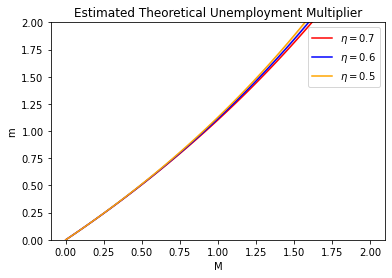

In [65]:
M_vals = np.linspace(start=M_bar_l, stop=M_bar_h, num=101)
m_vals = m_func(which='M', M=M_vals, eta=eta, u=u_bar, GY=GY_bar, tau=tau)
m_vals_h = m_func(which='M', M=M_vals, eta=eta_h, u=u_bar, GY=GY_bar, tau=tau_h)
m_vals_l = m_func(which='M', M=M_vals, eta=eta_l, u=u_bar, GY=GY_bar, tau=tau_l)
m_range = pd.DataFrame(data={f'$\eta = ${eta_h}':m_vals_h, 
                             f'$\eta = ${eta}':m_vals,
                             f'$\eta = ${eta_l}':m_vals_l},
                       index=M_vals)
m_range_ax = m_range.plot(title=r"Estimated Theoretical Unemployment Multiplier", 
                          color=['red', 'blue', 'orange'])
m_range_ax.set(xlabel='M', ylabel='m', ylim=(0, 2))
m_range_ax.fill_between(m_range.index, m_range[f'$\eta = ${eta_l}'], m_range[f'$\eta = ${eta_h}'], 
                        alpha=0.2, color='tab:orange');

As you can see, the choice of $\eta$ within our specified range makes very little difference. 

## $z_0$ and $z_1$

We now calibrate $z_0$ and $z_1$. $z_0$ and $z_1$ can be calculated with the following equations:

                $z_0 = \frac{1}{(1-\eta)(1-\bar{u})^2},$         [![Generic badge](https://img.shields.io/badge/MS19-p.%201315-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

and 


                $z_1 = \frac{\overline{g/y}\cdot \overline{c/y}}{\bar{u}}.$           [![Generic badge](https://img.shields.io/badge/MS19-p.%201316-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

We estimate $z_0$ to be about 2.83 and $z_1$ to be around $2.26$.

In [66]:
z0 = 1/((1 - eta)*(1 - u_bar)**2)
z0

2.827830175507158

In [67]:
z1 = GY_bar*(1 - GY_bar)/u_bar
z1

2.2609135556386306

## Storing Calibrated Parameter Values

We now collect all the calibrated parameter values into a dataframe.

In [72]:
params = {'s':s, 'u_bar':u_bar, 'x_bar':x_bar, 'GC_bar':GC_bar, 
          'M_bar':M_bar, 'M_bar_l':M_bar_l, 'M_bar_h':M_bar_h,
          'epsilon':epsilon, 'epsilon_h':epsilon_h, 'epsilon_l':epsilon_l,
          'eta':eta, 'eta_l':eta_l, 'eta_h':eta_h,
          'omega':omega, 'rho':rho, 'tau':tau, 'm_bar':m, 'z0':z0, 'z1':z1, 'GY_bar':GY_bar}
params = pd.DataFrame.from_dict(params, orient='index', columns=['value'])
params

,value
s,0.035579
u_bar,0.059750
x_bar,0.557752
GC_bar,0.191917
M_bar,0.500000
M_bar_l,0.000000
M_bar_h,2.000000
epsilon,1.000000
epsilon_h,1.500000
epsilon_l,0.500000


We now store the dataframe as a csv file in the `notebooks/output` folder.

```{warning}
Only run the cell below when you are in **Binder** mode. If you run this under the **Live Code** option, saving to this directory will throw an error message. 
```

In [74]:
params.to_csv('output/params_suffstat.csv')